In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('SchizophreniaSymptomnsData.csv')

In [3]:
df.drop(columns=['Name'], inplace=True)

In [4]:
gd_map = {
    'Female' : 0,
    'Male' : 1
}

marital_stat_map = {
    'Single': 0, 
    'Married': 1, 
    'Divorced': 2, 
    'Widowed': 3
}

label_map = {
    'Low Proneness' : 0,
    'Moderate Proneness' : 1,
    'Elevated Proneness' : 2,
    'High Proneness': 3,
    'Very High Proneness': 4
}

df['Gender'] = df['Gender'].map(gd_map)
df['Marital_Status'] = df['Marital_Status'].map(marital_stat_map)
df['Schizophrenia'] = df['Schizophrenia'].map(label_map)
df

,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,68,0,0,0.698075,0.123064,0.375303,0.234639,0.251869,2
1,88,1,1,0.049245,-0.042080,0.432807,0.501238,0.379948,1
2,67,0,1,0.651995,0.187117,NaN,0.301942,0.302588,2
3,95,0,3,0.036324,0.580808,0.005356,0.306968,0.813618,1
4,81,0,3,0.926727,0.484202,0.702405,0.736054,0.579448,3
...,...,...,...,...,...,...,...,...,...
4995,61,0,0,0.933016,0.505532,1.010435,0.868590,0.552105,3
4996,60,0,0,0.260125,0.625811,-0.076161,0.079046,0.593206,1
4997,62,1,1,0.248583,NaN,0.596990,0.119659,0.782998,1
4998,76,0,3,0.265702,0.525682,0.546284,0.402468,0.222236,1


In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9456018518518519
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.95      0.88      0.92       156
           2       0.93      1.00      0.97       530
           3       0.98      0.89      0.93       168
           4       0.00      0.00      0.00         3

    accuracy                           0.95       864
   macro avg       0.57      0.55      0.56       864
weighted avg       0.94      0.95      0.94       864



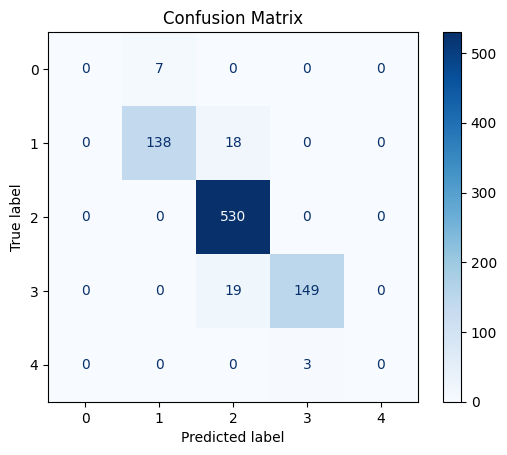

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()